In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
# import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(1010)

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 39s 0us/step


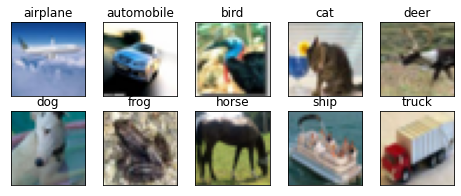

In [7]:
# Here are the classes in the dataset
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

#number of cifar-10 data set classes
num_classes = len(class_names)

def visualize_classes():
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        features_idx = x_train[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num,::],(1,2,0))
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

visualize_classes()

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [11]:
x_train[0].shape

(3, 32, 32)

In [14]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [16]:
y_train.shape

(50000, 10)

In [2]:
x_train.shape[1]

NameError: name 'x_train' is not defined

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 15, 15)        18496     
_________

In [21]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=100)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 140s 3ms/step - loss: 1.9440 - acc: 0.2835 - val_loss: 1.5225 - val_acc: 0.4464
Epoch 2/10
50000/50000 [==============================] - 171s 3ms/step - loss: 1.4601 - acc: 0.4710 - val_loss: 1.2677 - val_acc: 0.5463
Epoch 3/10
50000/50000 [==============================] - 287s 6ms/step - loss: 1.2681 - acc: 0.5435 - val_loss: 1.1258 - val_acc: 0.5994
Epoch 4/10
50000/50000 [==============================] - 158s 3ms/step - loss: 1.1373 - acc: 0.5969 - val_loss: 1.0080 - val_acc: 0.6447
Epoch 5/10
50000/50000 [==============================] - 164s 3ms/step - loss: 1.0363 - acc: 0.6316 - val_loss: 0.9280 - val_acc: 0.6771
Epoch 6/10
50000/50000 [==============================] - 166s 3ms/step - loss: 0.9626 - acc: 0.6603 - val_loss: 0.8489 - val_acc: 0.7061
Epoch 7/10
50000/50000 [====

In [22]:
y_predicts = model.predict_classes(x_test)
y_predicts

array([3, 8, 8, ..., 5, 1, 7])

In [24]:
y_test_argmax = np.argmax(y_test, axis=1)

In [29]:
total_count = len(y_test_argmax)
correct_count = 0
incorrect_count = 0
for num in range(len(y_test_argmax) -1):
    if y_test_argmax[num] == y_predicts[num]:
        correct_count += 1
    else:
        incorrect_count += 1

percentage_correct = correct_count/total_count
percentage_incorrect = incorrect_count/total_count
'The percentage of correctly classified pictures is {}. The percentage of incorrectly classified pictures is {}'.format(percentage_correct*100,percentage_incorrect*100)

'The percentage of correctly classified pictures is 75.05. The percentage of incorrectly classified pictures is 24.94'